In [28]:
# Imports
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [29]:
file_path = "CC GENERAL.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arjunbhasin2013/ccdata",
  file_path,)

df

C:\Users\jfhvj\AppData\Local\Temp\ipykernel_33448\3865586454.py:2: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [30]:

df = df.dropna()
df = df.drop(columns=['CUST_ID'])


df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [31]:

df["PAYMENT_RATIO"] = df["MINIMUM_PAYMENTS"] / df["CREDIT_LIMIT"]
df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PAYMENT_RATIO
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.139510
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.153191
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.083638
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.203993
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1.337359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0.086947
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0.048886
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0.082418
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0.111511


In [32]:
# Selección de columnas REALES usadas en la API
selected_cols = [
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
    'PAYMENTS', 'MINIMUM_PAYMENTS', 'PAYMENT_RATIO'
]

# Extraer solo esas columnas
df_selected = df[selected_cols].copy()

# Escalamiento Min-Max
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_selected),
    columns=selected_cols,
    index=df_selected.index
)

# 1. Añadir ruido gaussiano
noise_factor = 0.01
df_noisy = df_scaled + noise_factor * pd.DataFrame(
    np.random.normal(size=df_scaled.shape),
    columns=selected_cols,
    index=df_selected.index
)

# 2. Desplazamiento aleatorio en una columna (ej: BALANCE)
shift_factor = 0.05
df_shifted = df_scaled.copy()
df_shifted['BALANCE'] = df_scaled['BALANCE'] + np.random.uniform(
    -shift_factor, shift_factor, len(df_scaled)
)

# Invertir escalado para volver a escala original
df_noisy = pd.DataFrame(
    scaler.inverse_transform(df_noisy),
    columns=selected_cols,
    index=df_selected.index
)

df_shifted = pd.DataFrame(
    scaler.inverse_transform(df_shifted),
    columns=selected_cols,
    index=df_selected.index
)

# Concatenar el dataset original + ruidoso + desplazado
df_augmented = pd.concat([df_selected, df_noisy, df_shifted], ignore_index=True)

# Mostrar el resultado
df_augmented


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PAYMENT_RATIO
0,40.900749,95.40,0.000000,1000.0,201.802084,139.509787,0.139510
1,3202.467416,0.00,6442.945483,7000.0,4103.032597,1072.340217,0.153191
2,2495.148862,773.17,0.000000,7500.0,622.066742,627.284787,0.083638
3,817.714335,16.00,0.000000,1200.0,678.334763,244.791237,0.203993
4,1809.828751,1333.28,0.000000,1800.0,1400.057770,2407.246035,1.337359
...,...,...,...,...,...,...,...
25903,647.482991,20.90,0.000000,500.0,58.644883,43.473717,0.086947
25904,477.539421,291.12,0.000000,1000.0,325.594462,48.886365,0.048886
25905,5.183817,144.40,0.000000,1000.0,81.270775,82.418369,0.082418
25906,-514.514571,0.00,36.558778,500.0,52.549959,55.755628,0.111511


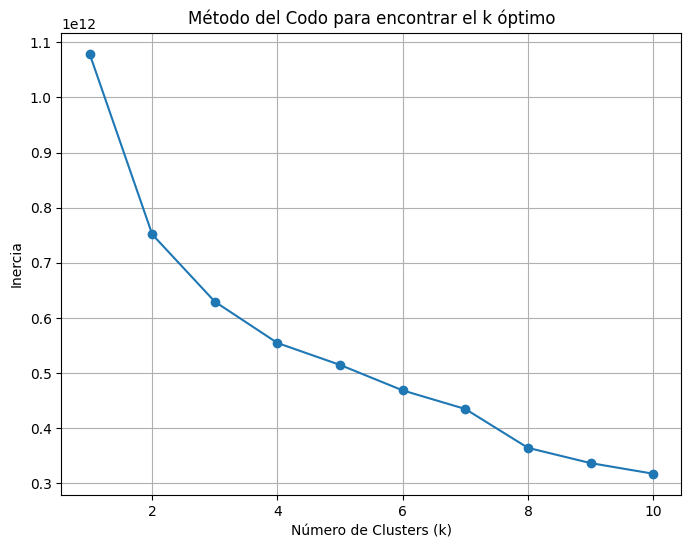

In [33]:
# Usamos directamente el df_augmented con las 7 columnas
features_for_clustering = df_augmented.copy()

# Aplicar el método del codo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_for_clustering)
    inertia.append(kmeans.inertia_)

# Graficar resultados
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo para encontrar el k óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


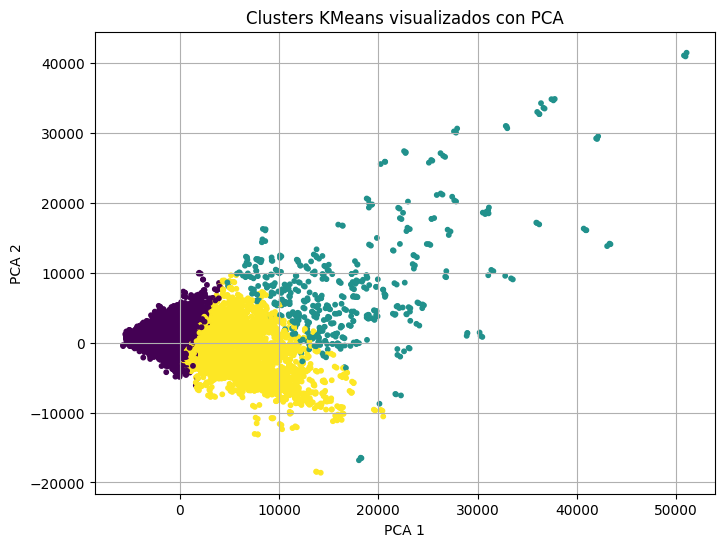

In [34]:
#  Asumimos que df_augmented contiene solo las 7 columnas seleccionadas

# Elegimos un valor de k según el método del codo anterior
optimal_k = 3

# Aplicar KMeans para crear la columna 'cluster'
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_augmented['cluster'] = kmeans.fit_predict(df_augmented)

# Reducir a 2 dimensiones para visualización con PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(df_augmented.drop(columns=["cluster"]))
df_augmented['pca1'] = reduced[:, 0]
df_augmented['pca2'] = reduced[:, 1]

# Visualización de los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_augmented['pca1'], df_augmented['pca2'], c=df_augmented['cluster'], cmap='viridis', s=10)
plt.title('Clusters KMeans visualizados con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [35]:

# Calcular el Silhouette Score (medida de calidad del clustering)
X_features = df_augmented.drop(columns=['cluster', 'pca1', 'pca2'])  # Excluir también las columnas de visualización si existen

silhouette_avg = silhouette_score(X_features, df_augmented['cluster'])
print(f"✅ Silhouette Score: {silhouette_avg:.4f}")


✅ Silhouette Score: 0.4473


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df_augmented['cluster'] = kmeans.fit_predict(df_augmented)

# Usar los clusters como variable target para AdaBoost
df_augmented['target'] = df_augmented['cluster']
X = df_augmented.drop(columns=['cluster', 'target', 'pca1', 'pca2']) 
y = df_augmented['target']

# Escalar para AdaBoost
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar modelo
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluar
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

report

'              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.98      3791\n           1       0.91      0.95      0.93      1304\n           2       1.00      0.79      0.88        87\n\n    accuracy                           0.96      5182\n   macro avg       0.96      0.90      0.93      5182\nweighted avg       0.96      0.96      0.96      5182\n'

In [37]:
import pickle

# Suponiendo que ya tienes:
# clf = modelo entrenado (AdaBoostClassifier)
# scaler = el objeto StandardScaler o MinMaxScaler usado

# Guardar el modelo
model_filename = 'adaboost_model_cc.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(clf, model_file)

# Guardar el scaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print(f"Modelo guardado como {model_filename}")
print(f"Scaler guardado como {scaler_filename}")


Modelo guardado como adaboost_model_cc.pkl
Scaler guardado como scaler.pkl
